<a href="https://colab.research.google.com/github/Avipsa1/UPPP275-Notebooks/blob/main/Attribute_join_and_spatial_join.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Attribute join and spatial join

There are two ways to combine datasets in `geopandas` – attribute joins and spatial joins.

In an <b>attribute join</b>, a `GeoSeries` or `GeoDataFrame` is combined with a regular pandas Series or DataFrame based on a <b>common variable</b>. This is analogous to normal merging or joining in pandas. An example would be joining student grade to student information based on student ID as the <b>key</b>. 

In a <b>spatial join</b>, observations from to GeoSeries or GeoDataFrames are combined based on their <b> spatial relationship</b> to one another. An example would be finding in which zipcode a crime incident happend by looking at which zipcode polygon contains that crime incident location. This operation definately needs more computation, but all is under the hood.

In the below example, we will be using sample datasets from `geopandas` library to demostrate. Note that there is one extra line of code to install a `rtree` package. You <b>have to do this</b> in order to make spatial join works in Google Colab.


In [1]:
!pip install geopandas
#Sorry this is an additional line of code you need in Google Colab in order to make things work
!sudo apt install python3-rtree
import geopandas
%matplotlib inline

     |████████████████████████████████| 1.0 MB 5.0 MB/s 
     |████████████████████████████████| 6.3 MB 43.3 MB/s 
     |████████████████████████████████| 16.7 MB 278 kB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 41 not upgraded.
Need to get 671 kB of archives.
After this operation, 3,948 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.co

## Attribute Joins

Attribute joins are accomplished using the merge method. In general, it is recommended to use the merge method called from the spatial dataset. With that said, the stand-alone merge function will work if the GeoDataFrame is in the left argument; if a DataFrame is in the left argument and a GeoDataFrame is in the right position, the result will no longer be a GeoDataFrame.





For example, consider the following merge that adds full names to a GeoDataFrame that initially has only ISO codes for each country by merging it with a pandas DataFrame.


In [2]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

country_shapes = world[['geometry', 'iso_a3']]
country_names = world[['name', 'iso_a3']]

The first table `country_shapes` contains geometry and iso code of a given country. 

In [3]:
country_shapes.head()

,geometry,iso_a3
0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",FJI
1,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",TZA
2,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",ESH
3,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CAN
4,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",USA


The second table `country_names` contains name and iso code of a given country. 

In [4]:
country_names.head()

,name,iso_a3
0,Fiji,FJI
1,Tanzania,TZA
2,W. Sahara,ESH
3,Canada,CAN
4,United States of America,USA


Lets merge two tables `country_names` with `country_shapes` using `merge` method on shared variable (iso codes `iso_a3`). The resulting table would have both name and geometry in one single table.

In [5]:
country_merged = country_shapes.merge(country_names, on='iso_a3')
country_merged.head()

,geometry,iso_a3,name
0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",FJI,Fiji
1,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",TZA,Tanzania
2,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",ESH,W. Sahara
3,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CAN,Canada
4,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",USA,United States of America


## Spatial Joins
<br></br>
Spatial joins are joining based on geometries. In this example, we have a list of cities that we know their coordinates, but we don't know which country each city is within. And spatial join can help in this case. The command in `geopandas` is `sjoin`.
<br></br>
<br></br>






In [6]:
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

In [7]:
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


<br></br>
Let's play around with those methods using the world countries example.</font>

In [8]:
countries = world[['geometry', 'name']]
countries = countries.rename(columns={'name':'country'})

In [9]:
countries.head()

,geometry,country
0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji
1,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania
2,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",W. Sahara
3,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada
4,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America


<br></br>
Let's execute the spatila join with the `sjoin()` command.</font>

In [10]:
# Execute spatial join
cities_with_country = geopandas.sjoin(cities, countries, how="inner", op='intersects')
cities_with_country.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


,name,geometry,index_right,country
0,Vatican City,POINT (12.45339 41.90328),141,Italy
1,San Marino,POINT (12.44177 43.93610),141,Italy
192,Rome,POINT (12.48131 41.89790),141,Italy
2,Vaduz,POINT (9.51667 47.13372),114,Austria
184,Vienna,POINT (16.36469 48.20196),114,Austria


<br></br>
And here we go, we can see that each city is now joined with the country. For example, Vatican City is joined with Italy.

## join function Parameters
<br></br>
 If you notice, there are two arguments in the `sjoin()` function above: `how="inner"` and `op='intersects'`.

### op
<br></br>
The `op` argument specifies how geopandas decides whether or not to join the attributes of one object to another. There are three different join options as follows:

* intersects: The attributes will be joined if the boundary and interior of the object intersect in any way with the boundary and/or interior of the other object.
* within: The attributes will be joined if the object’s boundary and interior intersect only with the interior of the other object (not its boundary or exterior).
* contains: The attributes will be joined if the object’s interior contains the boundary and interior of the other object and their boundaries do not touch at all.

You can read more about each join type in the Shapely documentation.

<br></br>
### how

The `how` argument specifies the type of join that will occur and which geometry is retained in the resultant geodataframe. It accepts the following options:

* left: use the index from the first (or left_df) geodataframe that you provide to sjoin; retain only the left_df geometry column
* right: use index from second (or right_df); retain only the right_df geometry column
* inner: use intersection of index values from both geodataframes; retain only the left_df geometry column


Note more complicated spatial relationships can be studied by combining geometric operations with spatial join. To find all polygons within a given distance of a point, for example, one can first use the buffer method to expand each point into a circle of appropriate radius, then intersect those buffered circles with the polygons in question.

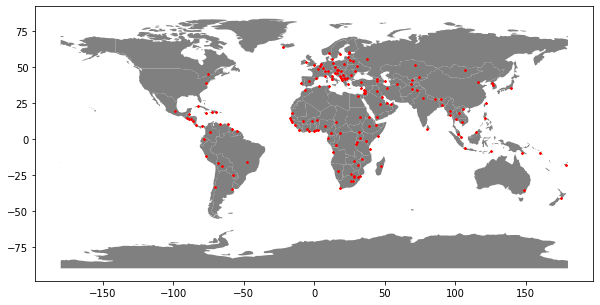

In [22]:
import matplotlib.pyplot as plt

ax = countries.plot(color = "grey", figsize = (10,8))
cities_with_country.plot(color = "red", ax=ax, markersize = 4, marker = '*')
plt.savefig('Cities within countries.png',dpi = 600)